In [4]:
import os
import numpy as np
import datetime
import pandas as pd

In [5]:
def read_data(data_path):
    data_frame = pd.read_csv(data_path)
    #data_frame = data_frame.set_index(pd.DatetimeIndex(data_frame['TIME']))
    #data_frame = data_frame.drop(columns=['icon', 'summary'])
    return data_frame

In [21]:
DATASET_PATH = "../middleware/data"
# DATASET_PATH = "D:/Thesis draft/code/UCF_ScaledHomeMqtt/middleware/data"
# data_file_name = "data.csv"

# data_file_name = "2_1_2020.csv"
# data_file_name = "2_2_2020.csv"
# data_file_name = "2_3_2020.csv"
# data_file_name = "decrease_outside.csv"
# data_file_name = "increase_outside.csv"
# data_file_name = "2_4_2020.csv"
data_file_name = "2_6_2020_new_simulation_no_smooth.csv"

# data_file_name = "data-only-increase.csv"
columns_to_drop = ["OUT_H[%]","T6[*C]","H6[%]","T12[*C]","H12[%]","T18[*C]",
                  "H18[%]","T19[*C]","H19[%]","T24[*C]","H24[%]","T25[*C]","H25[%]",
                  "T26[*C]","H26[%]","FAN_STATE","AC_STATE","HEATER_STATE", "M0", "M1", "M2",
                  "M3", "M4", "M5", "M6", "M8", "M9", "M10", "M11", "M12", "M13", "M14", "M15"]

FMT = '%Y-%m-%d %H:%M:%S.%f'

data_path = os.path.join(DATASET_PATH, data_file_name)
# print(data_path.replace('/','\\'))
data = read_data(data_path)
data.head()

,TIME,OUT_T[*C],OUT_H[%],T6[*C],H6[%],T12[*C],H12[%],T18[*C],H18[%],T19[*C],...,M5,M6,M8,M9,M10,M11,M12,M13,M14,M15
0,2020-02-06 10:39:41.949395,22.0,55.0,30.0,41.0,28.0,42.0,26.0,48.0,31.0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-06 10:39:48.255039,23.0,51.0,29.0,43.0,27.0,42.0,25.0,48.0,30.0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06 10:39:54.547390,23.0,51.0,29.0,43.0,27.0,42.0,26.0,49.0,30.0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-06 10:40:05.906464,23.0,51.0,29.0,43.0,27.0,42.0,26.0,49.0,30.0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-06 10:40:12.213480,23.0,51.0,29.0,43.0,27.0,42.0,26.0,49.0,30.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data1 = data.copy()
# for i, j in data1.iterrows(): 
#     j[0] = datetime.datetime.strptime(j[0], '%Y-%m-%d %H:%M:%S.%f').time()
#     print(j[0])

def cleanData(data,cols_to_drop):
    data_cleaned = data.drop(columns=cols_to_drop)
    return data_cleaned
    
def timeDiffence(data):
    time_list = list()
    temp_list = list()
    
    t0 = (data["TIME"][0])
    for i, j in data.iterrows(): 
        el = (datetime.datetime.strptime(j[0], FMT) - datetime.datetime.strptime(t0, FMT)).seconds
        time_list.append(el)
        temp_list.append(j[1])
    return np.array(time_list), np.array(temp_list)
    
data1 = cleanData(data1,columns_to_drop)
time_sh, temp_sh = timeDiffence(data1)

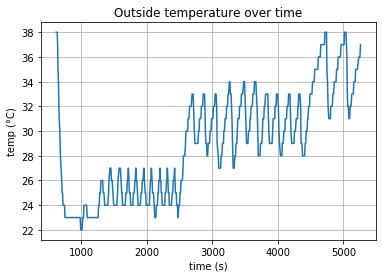

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

time1_sh = time_sh[76:]
temp1_sh = temp_sh[76:]

# time1_sh = time_sh[35:]
# temp1_sh = temp_sh[35:]

# time1_sh = time_sh
# temp1_sh = temp_sh

fig, ax = plt.subplots()

# %matplotlib inline

ax.plot(time1_sh, temp1_sh)

ax.set(xlabel='time (s)', ylabel='temp (°C)',
       title='Outside temperature over time')
ax.grid()

fig.savefig("plain_data.png")
plt.show()

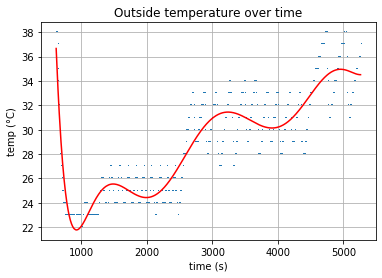

In [36]:
# print(temp)
# print(time)

p2 = np.polyfit(time1_sh,temp1_sh,9)

fig, ax = plt.subplots()

ax.plot(time1_sh, temp1_sh, ',')

ax.plot(time1_sh, np.polyval(p2,time1_sh),'r-')

ax.set(xlabel='time (s)', ylabel='temp (°C)',
       title='Outside temperature over time')
ax.grid()

fig.savefig("polinomial_regression.png")
plt.show()

2013-11-15T00:00:00.000000000
2013-11-15T21:00:00.000000000
2013-11-15T21:00:00.000000000
2013-11-15T00:00:00.000000000
8.8
7.0
5262
38.0
22.0


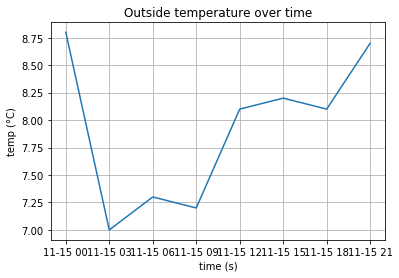

In [37]:
PROJECT_ROOT_ADDRESS = r"D:\Thesis draft\code\UCF_ML"

def read_dataset_from_csv(dataset_address, intervals):
    mydateparser = lambda x: pd.datetime.strptime(x, "%Y/%m/%d %H:%M")
    df = pd.read_csv(dataset_address, date_parser=mydateparser, index_col=1, header=None)
    df.columns = ('Year', 'Temp')
    df = df.drop(columns=['Year'])
    if dataset_address.endswith('data/mi_meteo_2001.csv'):
        df = df.iloc[18:618, :]

    df = df.iloc[::intervals, :]
    # df = df.set_index('Time')
    # df.index = pd.to_datetime(df.index, format="%Y/%m/%d %H:%M")
    return df

def takeEvery3Hours(dataset_address, desired_temp=25, intervals=3):
    """All temperatures are based on celsius"""
    df = read_dataset_from_csv(dataset_address, intervals=intervals)
    pd.set_option('display.max_rows', None)

    return list(df.index.values), list(df.values[:, 0])

dataset_address = os.path.join(PROJECT_ROOT_ADDRESS, 'data/mi_meteo_2001.csv')
time, temp = takeEvery3Hours(dataset_address, intervals=3)

time = time[:8]
temp = temp[:8]

print(time[0])
print(time[len(time)-1])
print(max(time))
print(min(time))

print(max(temp))
print(min(temp))

print(max(time_sh))
print(max(temp_sh))
print(temp_sh[0])


fig, ax = plt.subplots()

# %matplotlib inline

ax.plot(time[:8], temp[:8])

ax.set(xlabel='time (s)', ylabel='temp (°C)',
       title='Outside temperature over time')
ax.grid()

fig.savefig("plain_data.png")
plt.show()

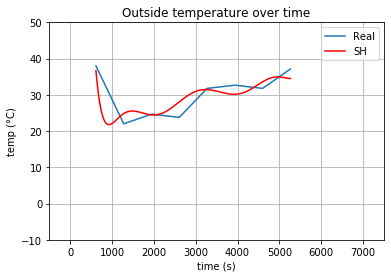

In [46]:
PROJECT_ROOT_ADDRESS = r"D:\Thesis draft\code\UCF_ML"

def read_dataset_from_csv(dataset_address, intervals):
    mydateparser = lambda x: pd.datetime.strptime(x, "%Y/%m/%d %H:%M")
    df = pd.read_csv(dataset_address, date_parser=mydateparser, index_col=1, header=None)
    df.columns = ('Year', 'Temp')
    df = df.drop(columns=['Year'])
    if dataset_address.endswith('data/mi_meteo_2001.csv'):
        df = df.iloc[18:618, :]

    df = df.iloc[::intervals, :]
    # df = df.set_index('Time')
    # df.index = pd.to_datetime(df.index, format="%Y/%m/%d %H:%M")
    return df

def takeEvery3Hours(dataset_address, desired_temp=25, intervals=3):
    """All temperatures are based on celsius"""
    df = read_dataset_from_csv(dataset_address, intervals=intervals)
    pd.set_option('display.max_rows', None)

    return list(df.index.values), list(df.values[:, 0])

dataset_address = os.path.join(PROJECT_ROOT_ADDRESS, 'data/mi_meteo_2001.csv')
time_real, temp_real = takeEvery3Hours(dataset_address, intervals=3)

time_real = time_real[:8]
temp_real = temp_real[:8]

# NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMinte

def scale(time_real, temp_real, time_sh, temp_sh):
    max_temp_sh = max(temp_sh)
    min_temp_sh = min(temp_sh)
    max_time_sh = max(time_sh)
    min_time_sh = min(time_sh)
    
    max_temp_real = max(temp_real)
    min_temp_real = min(temp_real)
    max_time_real = max(time_real)
    min_time_real = min(time_real)
    
    time_real_scaled = list()
    temp_real_scaled = list()
    
    for time in time_real:
        time_real_scaled.append( (time - min_time_real) * (max_time_sh - min_time_sh) / (max_time_real - min_time_real) + min_time_sh) 
    
    for temp in temp_real:
        temp_real_scaled.append( (temp - min_temp_real) * (max_temp_sh - min_temp_sh) / (max_temp_real - min_temp_real) + min_temp_sh)
    
    return np.array(time_real_scaled), np.array(temp_real_scaled)

t0 = str(time[0])[:22]
time_diff = list()
FMT = '%Y-%m-%dT%H:%M:%S.%f'
for i in time_real: 
    el = (datetime.datetime.strptime(str(i)[:22], FMT) - datetime.datetime.strptime(t0, FMT)).seconds
    time_diff.append(el)

# print(time_diff)

# print(time)

time_real_scaled, temp_real_scaled = scale(time_diff, temp_real, time1_sh, temp1_sh)

fig, ax = plt.subplots()

# %matplotlib inline

plt.ylim(-10, 50)
plt.xlim(-500, 7500)

line1, =ax.plot(time_real_scaled, temp_real_scaled)
# line2, =ax.plot(time1_sh, temp1_sh, 'o')

# print(temp_sh)

p2 = np.polyfit(time1_sh,temp1_sh,9)

line2, =ax.plot(time1_sh, np.polyval(p2,time1_sh),'r-')


ax.set(xlabel='time (s)', ylabel='temp (°C)',
       title='Outside temperature over time')

# ax.legend(loc='upper center', shadow=True, fontsize='x-large')
ax.legend((line1, line2), ('Real', 'SH'))


ax.grid()

fig.savefig("plain_data.png")
plt.show()

In [44]:
for el in range(1,4):
    print(el)

1
2
3
